In [51]:
import sklearn
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
data = pd.read_csv('C:\\Users\\dyd52\\Desktop\\원바틀 알고리즘\\PCA\\PCA_data.csv')
year = list(data['year'] )

In [37]:
data = data.iloc[ : , :12 ]
data

,win,lose,save,hold,ERA,anta,homerun,sasagu,samjin,lose_point_1,lose_point_2,WHIP
0,4,6,0,0,5.37,130,15,58,51,71,63,1.760
1,8,3,7,6,2.67,110,13,48,106,39,37,1.227
2,4,10,0,0,4.05,105,14,45,57,47,43,1.516
3,1,3,12,5,2.87,46,1,27,48,18,17,1.350
4,1,0,0,1,5.23,39,7,28,30,24,24,1.621
5,7,3,4,15,3.53,65,5,37,58,38,29,1.338
6,1,1,2,7,6.27,39,3,25,30,29,23,1.848
7,2,2,0,6,3.02,43,1,18,56,20,19,1.076
8,6,3,1,25,3.00,70,4,28,53,29,24,1.319
9,5,1,2,23,2.73,54,2,29,38,18,18,1.264


In [38]:
# 정규화
data_std = StandardScaler().fit_transform(data)

In [39]:
# Cov 만들기
feature = data_std.T
covariance_matrix = np.cov(feature)
print( covariance_matrix )

[[ 1.07142857  0.36799197  0.16450709  0.57933373 -0.11628713  0.70272687
   0.46591759  0.60146002  0.82561033  0.48613157  0.46441016 -0.22195151]
 [ 0.36799197  1.07142857  0.12475558 -0.19926633  0.10450892  0.73927253
   0.64255469  0.52727631  0.43656805  0.68542653  0.69042084  0.09529974]
 [ 0.16450709  0.12475558  1.07142857  0.07487617 -0.19832048  0.02472544
  -0.17545833  0.06714233  0.4158671  -0.12500649 -0.12710016 -0.30304058]
 [ 0.57933373 -0.19926633  0.07487617  1.07142857 -0.21842645 -0.03551331
  -0.37233204  0.01916209  0.18623945 -0.17288183 -0.23159615 -0.32013479]
 [-0.11628713  0.10450892 -0.19832048 -0.21842645  1.07142857  0.18439607
   0.31321829  0.06933424 -0.14954348  0.53102647  0.53790979  0.76129771]
 [ 0.70272687  0.73927253  0.02472544 -0.03551331  0.18439607  1.07142857
   0.95441155  0.95239435  0.76738154  0.95809871  0.97601748  0.25237481]
 [ 0.46591759  0.64255469 -0.17545833 -0.37233204  0.31321829  0.95441155
   1.07142857  0.85579133  0.559

In [40]:
# Eig value , Eig Vector 분리

eig_vals , eig_vecs = np.linalg.eig( covariance_matrix )

print('eigen Vector')
print( eig_vecs )

eigen Vector
[[ 0.24474971 -0.39979003  0.3343485  -0.0121645   0.08302145  0.22439253
   0.46476701  0.42428791  0.22748763  0.32780322 -0.231846    0.04579634]
 [ 0.28585179 -0.04167546 -0.33380229  0.08391909  0.75054764 -0.29623528
   0.24368735 -0.26568551 -0.04170325  0.12090909 -0.00289795 -0.0258755 ]
 [-0.00387747 -0.30712468 -0.43219232 -0.76114205 -0.07150337 -0.16933046
  -0.03920699  0.29712148 -0.10395068 -0.04039672  0.05396572 -0.02404468]
 [-0.04746095 -0.36565987  0.67792384 -0.14792894  0.21573142 -0.3228221
  -0.1457542  -0.10345997 -0.27516992 -0.22046043  0.24149078 -0.13128257]
 [ 0.13716846  0.42035068  0.25608563 -0.50267954  0.2178549   0.45369946
  -0.04869807 -0.21389621 -0.30666651  0.19224866 -0.15052765  0.1764484 ]
 [ 0.40009255 -0.09104677 -0.01136866  0.0839941  -0.01202707 -0.04307589
  -0.12984006  0.07584966 -0.0763081  -0.60059081 -0.43544166  0.49365848]
 [ 0.37761847  0.0938373  -0.10764254  0.21429877 -0.17689203  0.14638895
   0.28908965  0.256

In [41]:
print('eigen Value')
print( eig_vals )

eigen Value
[6.36752577e+00 2.84281828e+00 1.24223855e+00 9.36389544e-01
 6.09176783e-01 4.23580247e-01 1.73942689e-01 1.39071067e-01
 7.00321842e-02 3.96604482e-02 1.10275418e-02 1.67975171e-03]


In [50]:
for i in range(0 , 12):
    
    print('PC_' + str(i+1) + ' : ' , eig_vals[i] / sum(eig_vals) )

PC_1 :  0.4952520046128728
PC_2 :  0.22110808851217933
PC_3 :  0.0966185536431553
PC_4 :  0.07283029785970678
PC_5 :  0.04738041643555932
PC_6 :  0.032945130349367864
PC_7 :  0.013528875810048356
PC_8 :  0.010816638542509725
PC_9 :  0.005446947657620044
PC_10 :  0.003084701528721603
PC_11 :  0.0008576976931959934
PC_12 :  0.0001306473550628903


In [55]:
# 시각화

pc_1 = data_std.dot( eig_vecs.T[0])
pc_2 = data_std.dot( eig_vecs.T[1])

result = pd.DataFrame( {'PC_1' : pc_1 , 'PC_2': pc_2 , 'year' : year })
result

,PC_1,PC_2,year
0,5.332259,1.914918,2001
1,3.221949,-2.882742,2002
2,3.640044,0.639065,2003
3,-1.597534,-0.997487,2004
4,-0.951210,2.049950,2009
5,0.836171,-1.611566,2010
6,-0.939210,2.279991,2011
7,-1.833635,-0.736346,2012
8,-0.059306,-1.825020,2013
9,-1.427499,-1.679524,2014


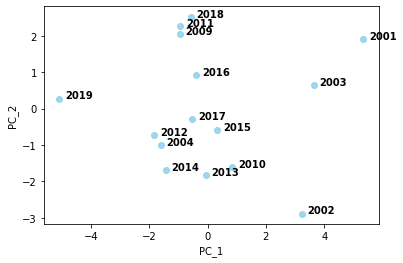

In [65]:
# basic plot
p1=sns.regplot(data=result, x="PC_1", y="PC_2", fit_reg=False, marker="o", color="skyblue")
 
# add annotations one by one with a loop
for line in range(0,result.shape[0]):
     p1.text(result.PC_1[line]+0.2, result.PC_2[line], result.year[line], horizontalalignment='left', size='medium', color='black', weight='semibold')